In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("hf://datasets/criteo/criteo-uplift/criteo-research-uplift-v2.1.csv.gz")

In [71]:
import os
from utils import eda_helper

In [72]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


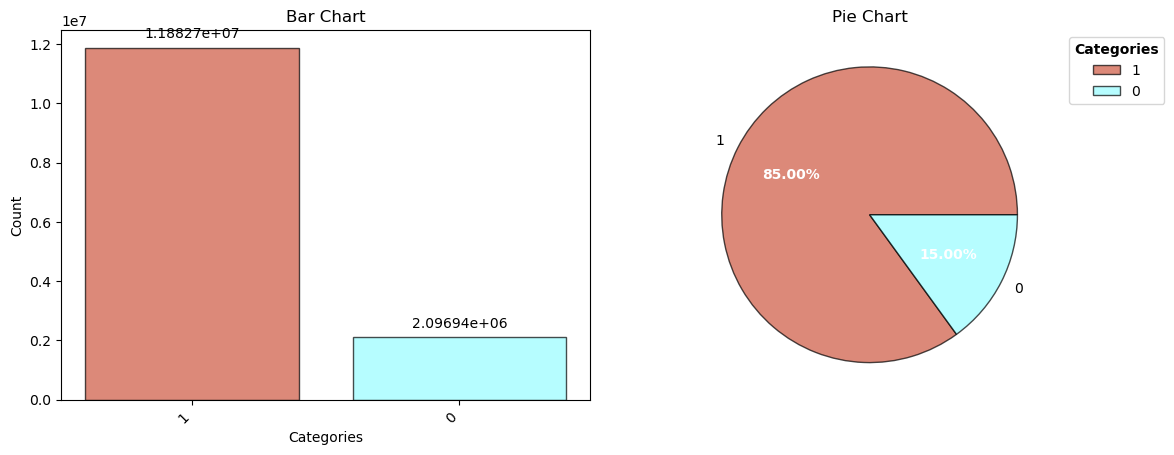

In [73]:
eda_helper.cat_univar_plots(df,'treatment')

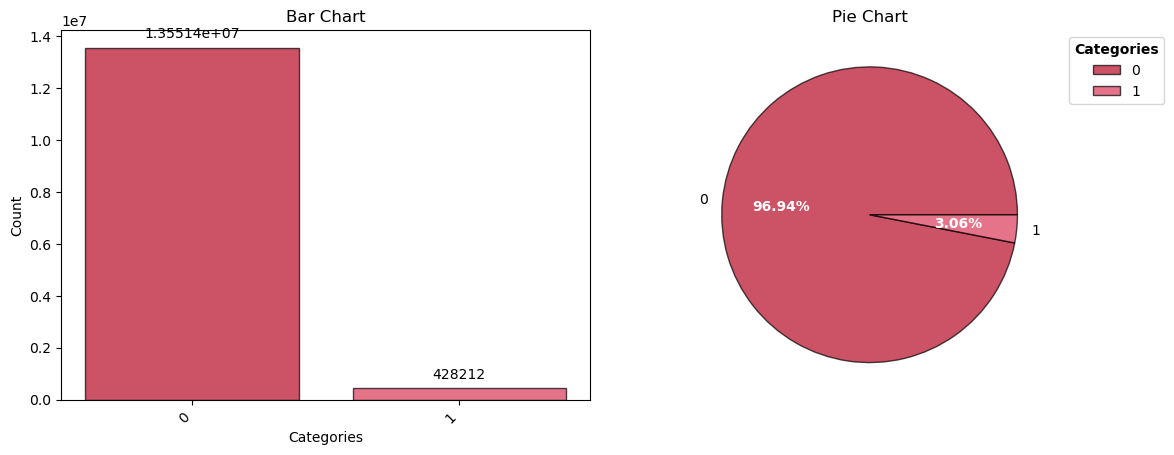

In [74]:
eda_helper.cat_univar_plots(df,'exposure')

In [75]:
counts = [
    len(df[(df['treatment']==0) & (df['exposure']==1)]),
    len(df[(df['treatment']==1) & (df['exposure']==0)]),
    len(df[(df['treatment']==1) & (df['exposure']==1)]),
    len(df[(df['treatment']==0) & (df['exposure']==0)])
]

(-1.0999999463802241,
 1.0999999974466774,
 -1.0999998901015866,
 1.0999999844890815)

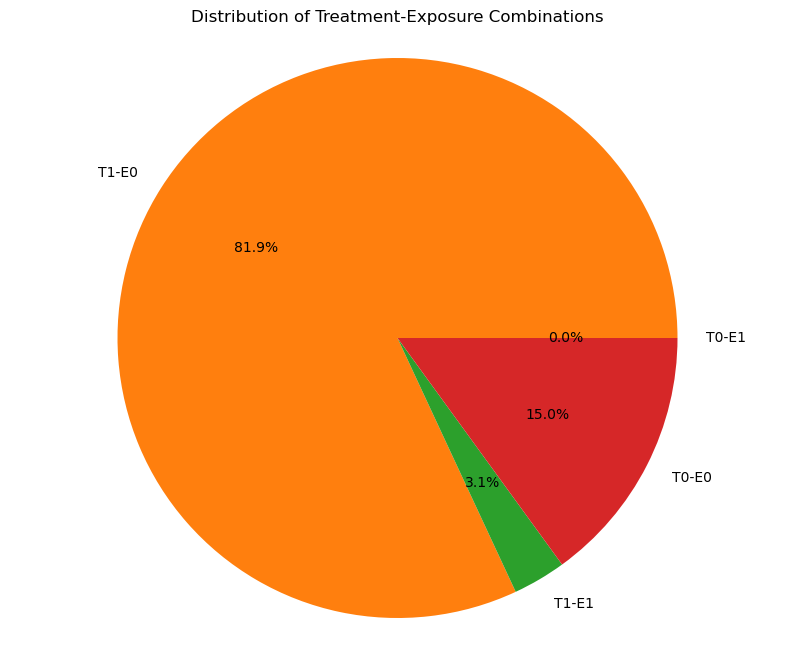

In [76]:
labels = ['T0-E1', 'T1-E0', 'T1-E1', 'T0-E0']
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Treatment-Exposure Combinations')
plt.axis('equal')

(-1.0999996916179857,
 1.099999985315142,
 -1.0999996766462565,
 1.0999998952413421)

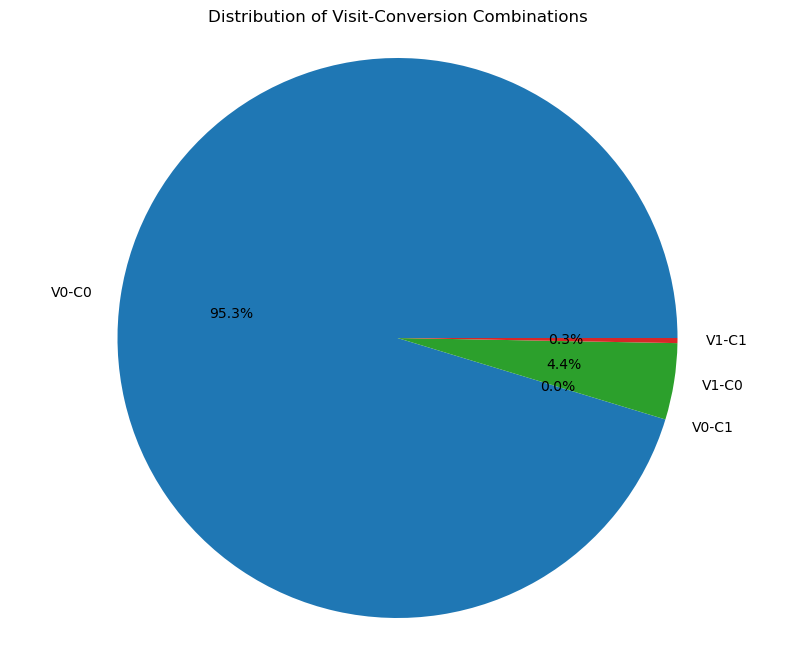

In [77]:
# Calculate counts for each visit-conversion combination
visit_conv_counts = [
    len(df[(df['visit']==0) & (df['conversion']==0)]),
    len(df[(df['visit']==0) & (df['conversion']==1)]),
    len(df[(df['visit']==1) & (df['conversion']==0)]),
    len(df[(df['visit']==1) & (df['conversion']==1)])
]

# Create pie chart
labels = ['V0-C0', 'V0-C1', 'V1-C0', 'V1-C1']
plt.figure(figsize=(10, 8))
plt.pie(visit_conv_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Visit-Conversion Combinations')
plt.axis('equal')

(-1.0999998183883022,
 1.099999991351824,
 -1.0999996584744443,
 1.0999999467242163)

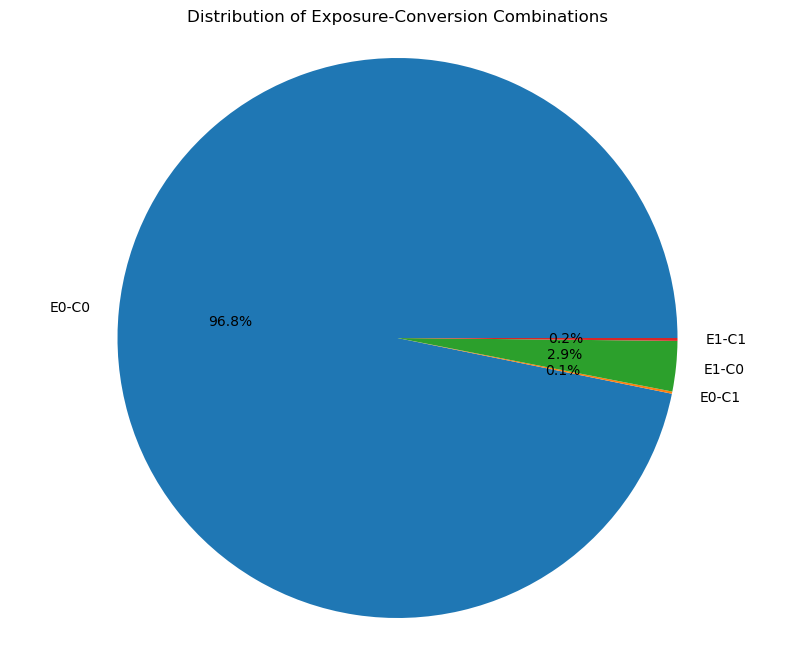

In [78]:
# Calculate counts for each exposure-conversion combination
exp_conv_counts = [
    len(df[(df['exposure']==0) & (df['conversion']==0)]),
    len(df[(df['exposure']==0) & (df['conversion']==1)]),
    len(df[(df['exposure']==1) & (df['conversion']==0)]),
    len(df[(df['exposure']==1) & (df['conversion']==1)])
]

# Create pie chart
labels = ['E0-C0', 'E0-C1', 'E1-C0', 'E1-C1']
plt.figure(figsize=(10, 8))
plt.pie(exp_conv_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Exposure-Conversion Combinations')
plt.axis('equal')

(-1.099999849013944,
 1.0999999928101878,
 -1.099999879274404,
 1.0999999833753369)

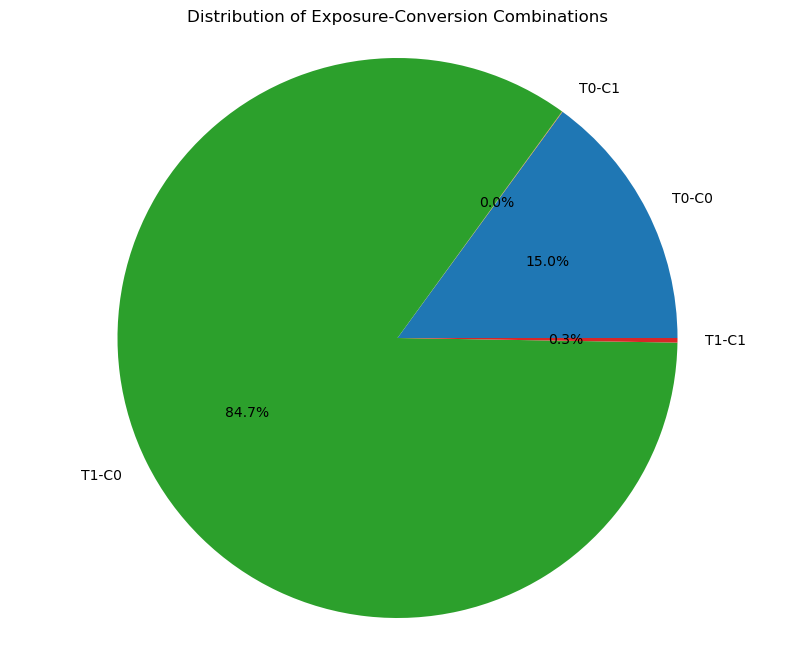

In [79]:
# Calculate counts for each exposure-conversion combination
treat_conv_counts = [
    len(df[(df['treatment']==0) & (df['conversion']==0)]),
    len(df[(df['treatment']==0) & (df['conversion']==1)]),
    len(df[(df['treatment']==1) & (df['conversion']==0)]),
    len(df[(df['treatment']==1) & (df['conversion']==1)])
]

# Create pie chart
labels = ['T0-C0', 'T0-C1', 'T1-C0', 'T1-C1']
plt.figure(figsize=(10, 8))
plt.pie(treat_conv_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Exposure-Conversion Combinations')
plt.axis('equal')

Key insight to note is that there are no groups which was not treated and ended up converting.
Also there were no groups which were not treated but got exposed .

In [80]:
df1=df.drop(['visit'],axis=1)

In [ ]:
df1.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0


: 

In [ ]:
# Step 1: Group by treatment, exposure, and conversion
stratified_groups = df.groupby(['treatment', 'exposure', 'conversion'])

# Step 2: Sample proportionally from each group
sample_size = 100000  # Adjust to your needs
sampled_df = stratified_groups.apply(lambda x: x.sample(frac=sample_size/len(df), random_state=42))

# Reset index and save
sampled_df.reset_index(drop=True, inplace=True)
sampled_df.to_csv('stratified_sample.csv', index=False)

In [ ]:
def print_proportions(data, name):
    print(f"\n{name} Proportions:")
    print("Treatment:", data['treatment'].value_counts(normalize=True))
    print("Exposure (Treatment=1):", 
          data[data['treatment']==1]['exposure'].value_counts(normalize=True))
    print("Conversion (Exposure=1):", 
          data[data['exposure']==1]['conversion'].value_counts(normalize=True))

print_proportions(df, "Original Data")
print_proportions(sampled_df, "Sampled Data")


Original Data Proportions:
Treatment: treatment
1    0.85
0    0.15
Name: proportion, dtype: float64
Exposure (Treatment=1): exposure
0    0.963963
1    0.036037
Name: proportion, dtype: float64
Conversion (Exposure=1): conversion
0    0.946216
1    0.053784
Name: proportion, dtype: float64

Sampled Data Proportions:
Treatment: treatment
1    0.85
0    0.15
Name: proportion, dtype: float64
Exposure (Treatment=1): exposure
0    0.963965
1    0.036035
Name: proportion, dtype: float64
Conversion (Exposure=1): conversion
0    0.946131
1    0.053869
Name: proportion, dtype: float64


In [ ]:
sampled_df['exposure'].sum()

3063

In [2]:
df=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/hackathon/stratified_sample.csv")

In [3]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,21.540788,10.059654,8.214383,4.679882,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
1,16.817444,10.059654,8.727821,3.907662,10.280525,4.115453,-5.987667,4.833815,3.863287,13.190056,5.300375,-0.168679,0,0,0,0
2,13.882037,10.059654,8.214383,3.907662,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
3,22.992071,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
4,22.390426,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.871296,10.059654,8.496208,-2.036172,10.280525,4.115453,-13.469979,4.833815,3.860579,33.712556,5.300375,-0.168679,1,1,1,1
99996,13.977596,10.059654,8.292136,-3.117913,15.402626,4.115453,-18.175175,4.833815,3.737599,49.919125,5.409592,-0.689470,1,1,1,1
99997,21.749980,10.059654,8.241708,4.679882,10.280525,2.230907,-18.734886,9.881964,3.854508,24.452088,5.300375,-0.168679,1,1,1,1
99998,23.112522,10.059654,8.332642,4.679882,11.029584,4.115453,-8.493011,4.833815,3.742365,43.127255,6.107325,-0.168679,1,1,1,1


In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('conversion', axis=1)  # Features
y = df['conversion']  # Target

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create new balanced dataframe
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                        pd.Series(y_resampled, name='conversion')], axis=1)

print("Original conversion distribution:\n", df['conversion'].value_counts(normalize=True))
print("\nBalanced conversion distribution:\n", df_balanced['conversion'].value_counts(normalize=True))

Original conversion distribution:
 conversion
0    0.99708
1    0.00292
Name: proportion, dtype: float64

Balanced conversion distribution:
 conversion
0    0.5
1    0.5
Name: proportion, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [6]:
df_balanced.to_csv("balanced_smote.csv",index=False)